In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [65]:
file_path = '../notebooks/Clean_Data_Preprocessed.csv'  # Use '..' to go up one level

df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head(10)

,Puissance administrative,Puissance maximale (kW),Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),...,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INF,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE
0,0.1375,0.249408,0.274939,0.247934,0.283262,0.284404,0.617861,0.016802,0.519403,0.003279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.1000,0.209357,0.160584,0.123967,0.167382,0.200000,0.194185,0.091057,0.567164,0.004918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0750,0.163845,0.160584,0.115702,0.167382,0.196330,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0750,0.163845,0.160584,0.115702,0.167382,0.196330,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.1000,0.209357,0.167883,0.123967,0.175966,0.205505,0.057113,0.088347,0.578358,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.1000,0.209357,0.167883,0.123967,0.175966,0.205505,0.057113,0.088347,0.578358,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.1375,0.249408,0.279805,0.264463,0.291845,0.291743,0.617861,0.016802,0.529851,0.003279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.1000,0.209357,0.163017,0.132231,0.171674,0.205505,0.194185,0.091057,0.567164,0.004918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0750,0.163845,0.165450,0.123967,0.171674,0.201835,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0750,0.163845,0.165450,0.123967,0.171674,0.201835,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
# Separating target feature from the remaining features
X = df.drop(columns=['CO2 (g/km)'])  # Features
y = df['CO2 (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse,6))


Mean Squared Error: 2.6e-05


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, max_error, mean_squared_log_error, explained_variance_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)


# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)


# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)


mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

metrics_values = [round(mse, 6), round(r2, 6), round(mae, 6), round(rmse, 6), round(msle, 6), 
                  round(medae, 6), round(max_err, 6), round(evs, 6), round(mape, 6), round(r2_adj, 6)]

metrics_Lr = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Ausgabe der Tabelle
metrics_Lr


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000026
1,R2,0.994590
2,MAE,0.002660
3,RMSE,0.005086
4,MSLE,0.000016
5,MedAE,0.001631
6,Max Err,0.091257
7,EVS,0.994590
8,MAPE,0.009730
9,R2 Adjusted,0.994244


In [17]:
from sklearn.decomposition import PCA
# Separating target feature from the remaining features
X = df.drop(columns=['CO2 (g/km)'])  # Features
y = df['CO2 (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

metrics_values = [round(mse, 6), round(r2, 6), round(mae, 6), round(rmse, 6), round(msle, 6), 
                  round(medae, 6), round(max_err, 6), round(evs, 6), round(mape, 6), round(r2_adj, 6)]

metrics_pca = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_pca

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000592
1,R2,0.876186
2,MAE,0.017638
3,RMSE,0.024329
4,MSLE,0.000351
5,MedAE,0.013498
6,Max Err,0.170917
7,EVS,0.876187
8,MAPE,0.062014
9,R2 Adjusted,0.868263


In [21]:
from sklearn.linear_model import Ridge

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model with a specific alpha (regularization strength)
alpha = 1.0  # We can adjust this value based on cross-validation
ridge_model = Ridge(alpha=alpha)

# Train the Ridge Regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

metrics_values = [round(mse, 6), round(r2, 6), round(mae, 6), round(rmse, 6), round(msle, 6), 
                  round(medae, 6), round(max_err, 6), round(evs, 6), round(mape, 6), round(r2_adj, 6)]

metrics_rdg = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_rdg


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000029
1,R2,0.994011
2,MAE,0.003036
3,RMSE,0.005351
4,MSLE,0.000017
5,MedAE,0.002148
6,Max Err,0.092060
7,EVS,0.994011
8,MAPE,0.010805
9,R2 Adjusted,0.993628


In [22]:
from sklearn.linear_model import RidgeCV
import numpy as np
# Define a range of alpha values to try
alphas = [0.1, 1.0, 10.0]

# Initialize RidgeCV with the list of alphas and specify cv parameter for cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the model
ridge_cv.fit(X_train, y_train)

# Get the optimal alpha
optimal_alpha = ridge_cv.alpha_
print("Optimal Alpha:", optimal_alpha)
# Make predictions on the test set
y_pred = ridge_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

metrics_values = [round(mse, 6), round(r2, 6), round(mae, 6), round(rmse, 6), round(msle, 6), 
                  round(medae, 6), round(max_err, 6), round(evs, 6), round(mape, 6), round(r2_adj, 6)]

metrics_RidgeCV = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_RidgeCV

Optimal Alpha: 0.1


,Metric,Value
0,MSE,0.000027
1,R2,0.994342
2,MAE,0.002803
3,RMSE,0.005201
4,MSLE,0.000016
5,MedAE,0.001923
6,Max Err,0.092525
7,EVS,0.994342
8,MAPE,0.010141
9,R2 Adjusted,0.993980


In [23]:
from sklearn.model_selection import GridSearchCV

# Apply dimensionality reduction technique (e.g., PCA)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Apply Ridge Regression with cross-validation
param_grid = {'alpha': [0.1, 1, 10]}  # Example alpha values
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the optimal alpha
optimal_alpha = grid_search.best_params_['alpha']
print("Optimal Alpha:", optimal_alpha)

# Apply Ridge Regression with the optimal alpha
ridge_model = Ridge(alpha=optimal_alpha)
ridge_model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

metrics_GridSearchCV = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_GridSearchCV


Optimal Alpha: 1


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000588
1,R2,0.877060
2,MAE,0.017591
3,RMSE,0.024243
4,MSLE,0.000348
5,MedAE,0.013360
6,Max Err,0.170499
7,EVS,0.877062
8,MAPE,0.061786
9,R2 Adjusted,0.876809


In [31]:
from sklearn.linear_model import Lasso

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Lasso Regression model
alpha = 0.1  # regularization parameter
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
metrics_Lasso_1 = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_Lasso_1


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.004781
1,R2,-0.000038
2,MAE,0.051255
3,RMSE,0.069143
4,MSLE,0.002842
5,MedAE,0.031214
6,Max Err,0.203649
7,EVS,0.000000
8,MAPE,0.195764
9,R2 Adjusted,-0.064028


In [32]:
from sklearn.model_selection import GridSearchCV

# Define the Lasso Regression model
lasso_model = Lasso()

# Define the alpha values to search
alphas = [0.01, 0.1, 1.0, 10.0]  # Example values

# Define the parameter grid
param_grid = {'alpha': alphas}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform GridSearchCV
grid_search.fit(X, y)

# Get the best alpha value
optimal_alpha = grid_search.best_params_['alpha']

# Print the optimal alpha value
print("Optimal Alpha:", optimal_alpha)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Lasso Regression model
lasso_model = Lasso(alpha=optimal_alpha)  # Use the optimal alpha obtained from GridSearchCV

# Train the Lasso Regression model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)
# Print the evaluation metrics

metrics_Lasso = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_Lasso


Optimal Alpha: 0.01


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.002982
1,R2,0.376282
2,MAE,0.037452
3,RMSE,0.054605
4,MSLE,0.001758
5,MedAE,0.023212
6,Max Err,0.237502
7,EVS,0.376283
8,MAPE,0.140266
9,R2 Adjusted,0.336371


In [33]:
from sklearn.linear_model import ElasticNet

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the ElasticNet Regression model
alpha = 0.1  # regularization parameter
l1_ratio = 0.5  # mixing parameter, 0.0 for L2 penalty, 1.0 for L1 penalty
elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elasticnet_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elasticnet_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
metrics_elasticnet_1 = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_elasticnet_1


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.004781
1,R2,-0.000038
2,MAE,0.051255
3,RMSE,0.069143
4,MSLE,0.002842
5,MedAE,0.031214
6,Max Err,0.203649
7,EVS,0.000000
8,MAPE,0.195764
9,R2 Adjusted,-0.064028


In [34]:
from sklearn.model_selection import GridSearchCV

# Define the ElasticNet model
elastic_net = ElasticNet()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Mixing parameter
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the ElasticNet model with the best hyperparameters
best_elastic_net = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
best_elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)


metrics_elasticnet = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_elasticnet


Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.1}


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000778
1,R2,0.837260
2,MAE,0.018575
3,RMSE,0.027892
4,MSLE,0.000448
5,MedAE,0.011893
6,Max Err,0.186258
7,EVS,0.837264
8,MAPE,0.066380
9,R2 Adjusted,0.826846


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
metrics_dt_regressor = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_dt_regressor


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,4.827754e-06
1,R2,9.989901e-01
2,MAE,1.708708e-04
3,RMSE,2.197215e-03
4,MSLE,2.790694e-06
5,MedAE,5.551115e-16
6,Max Err,1.706422e-01
7,EVS,9.989902e-01
8,MAPE,6.864041e-04
9,R2 Adjusted,9.989255e-01


In [36]:
from sklearn.decomposition import PCA


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a decision tree regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the results
metrics_dt_regressor_pca = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_dt_regressor_pca


,Metric,Value
0,MSE,7.246555e-05
1,R2,9.848415e-01
2,MAE,1.287417e-03
3,RMSE,8.512670e-03
4,MSLE,4.312053e-05
5,MedAE,3.330669e-16
6,Max Err,2.477064e-01
7,EVS,9.848434e-01
8,MAPE,5.345417e-03
9,R2 Adjusted,9.838715e-01


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics

metrics_rf_model = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_rf_model



C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,4.253333e-06
1,R2,9.991103e-01
2,MAE,2.007196e-04
3,RMSE,2.062361e-03
4,MSLE,2.544666e-06
5,MedAE,6.106227e-16
6,Max Err,1.529908e-01
7,EVS,9.991104e-01
8,MAPE,8.510308e-04
9,R2 Adjusted,9.990533e-01


In [39]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize Bagging Regressor with Decision Tree base estimator
bagged_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Fit the model
bagged_dt.fit(X_train, y_train)

# Make predictions
y_pred = bagged_dt.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics

metrics_bagged_dt = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_bagged_dt


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,4.535139e-06
1,R2,9.990513e-01
2,MAE,2.190500e-04
3,RMSE,2.129587e-03
4,MSLE,2.754245e-06
5,MedAE,3.885781e-16
6,Max Err,1.508257e-01
7,EVS,9.990514e-01
8,MAPE,9.377392e-04
9,R2 Adjusted,9.989906e-01


In [40]:
from sklearn.svm import SVR

# Initialize Bagging Regressor with SVR base estimator
bagged_svm = BaggingRegressor(estimator=SVR(), n_estimators=20, random_state=42)

# Fit the model
bagged_svm.fit(X_train, y_train)

# Make predictions
y_pred = bagged_svm.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics

metrics_bagged_svm = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_bagged_svm


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.001666
1,R2,0.651520
2,MAE,0.031755
3,RMSE,0.040816
4,MSLE,0.000986
5,MedAE,0.021914
6,Max Err,0.103569
7,EVS,0.654758
8,MAPE,0.115697
9,R2 Adjusted,0.629221


In [41]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize AdaBoostRegressor
adaboost = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics

metrics_adaboost = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_adaboost


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000178
1,R2,0.962735
2,MAE,0.010845
3,RMSE,0.013347
4,MSLE,0.000102
5,MedAE,0.008316
6,Max Err,0.131194
7,EVS,0.973949
8,MAPE,0.035307
9,R2 Adjusted,0.960351


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
metrics_grboost = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_grboost

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000012
1,R2,0.997574
2,MAE,0.001656
3,RMSE,0.003405
4,MSLE,0.000007
5,MedAE,0.000880
6,Max Err,0.099021
7,EVS,0.997575
8,MAPE,0.006196
9,R2 Adjusted,0.997419


In [52]:
# pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 0.3/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 0.5/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 0.6/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 0.7/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 0.9/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.0/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.1/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 1.3/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.5/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 1.6/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 1.8/124.9 MB 3.4 MB/s eta 0

In [44]:
import xgboost as xgb

# Initialize XGBRegressor
xgboost = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the model
xgboost.fit(X_train, y_train)

# Make predictions
y_pred = xgboost.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
metrics_xgboost = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_xgboost


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000004
1,R2,0.999107
2,MAE,0.000387
3,RMSE,0.002066
4,MSLE,0.000003
5,MedAE,0.000078
6,Max Err,0.146001
7,EVS,0.999107
8,MAPE,0.001576
9,R2 Adjusted,0.999050


In [24]:
pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB 3.6 MB/s eta 0:01:46
   ---------------------------------------- 0.3/377.0 MB 3.5 MB/s eta 0:01:47
   ---------------------------------------- 0.5/377.0 MB 3.3 MB/s eta 0:01:55
   ---------------------------------------- 0.6/377.0 MB 3.6 MB/s eta 0:01:45
   ---------------------------------------- 0.8/377.0 MB 3.6 MB/s eta 0:01:46
   ---------------------------------------- 0.9/377.0 MB 3.5 MB/s eta 0:01:49
   ---------------------------------------- 1.1/377.0 MB 3.5 MB/s eta 0:01:49
   ---------------------------------------- 1.2/377.0 MB 3.4 MB/s eta 0:01:50
   ---------------------------------------- 1.4/377.0 MB 3.4 MB/s eta 0:01:50
   ---------------------------------------- 1.6/377.0 MB 3.4 MB/s eta 0:01:

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input_shape based on the number of features in data
input_shape = X_train.shape[1]
# Initialize the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics

metrics_tf1 = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_tf1


C:\Users\abida\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0028 - mae: 0.0249 - mse: 0.0028 - val_loss: 5.9570e-05 - val_mae: 0.0056 - val_mse: 5.9570e-05
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7378e-05 - mae: 0.0052 - mse: 5.7378e-05 - val_loss: 2.7778e-05 - val_mae: 0.0032 - val_mse: 2.7778e-05
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0917e-05 - mae: 0.0036 - mse: 3.0917e-05 - val_loss: 2.1900e-05 - val_mae: 0.0028 - val_mse: 2.1900e-05
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.6547e-05 - mae: 0.0033 - mse: 2.6547e-05 - val_loss: 1.9195e-05 - val_mae: 0.0023 - val_mse: 1.9195e-05
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9808e-05 - mae: 0.0029 - mse: 1.9808e-05 - val_loss: 2.7757e-05 - val_mae: 0.0032 - val_mse: 2.7757e-05
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3073e-05 - mae: 0.0032 - mse: 2.3073e-05 - val_loss: 1.6782e-05 - val_mae: 0.0024 - val_mse: 1.6782e-05
Epoch 

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000007
1,R2,0.998560
2,MAE,0.001468
3,RMSE,0.002624
4,MSLE,0.000004
5,MedAE,0.001149
6,Max Err,0.113541
7,EVS,0.998777
8,MAPE,0.005053
9,R2 Adjusted,0.998468


In [46]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error, mean_squared_log_error, explained_variance_score

# Define input_shape based on the number of features in data
input_shape = X_train.shape[1]

# Initialize the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
metrics_tf2 = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_tf2


Epoch 1/100


C:\Users\abida\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0042 - mae: 0.0292 - mse: 0.0042 - val_loss: 1.1473e-04 - val_mae: 0.0081 - val_mse: 1.1473e-04
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.6700e-05 - mae: 0.0070 - mse: 8.6700e-05 - val_loss: 5.3085e-05 - val_mae: 0.0052 - val_mse: 5.3085e-05
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.8138e-05 - mae: 0.0043 - mse: 3.8138e-05 - val_loss: 2.5976e-05 - val_mae: 0.0032 - val_mse: 2.5976e-05
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.2421e-05 - mae: 0.0038 - mse: 3.2421e-05 - val_loss: 2.4496e-05 - val_mae: 0.0028 - val_mse: 2.4496e-05
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.6332e-05 - mae: 0.0035 - mse: 2.6332e-05 - val_loss: 2.8767e-05 - val_mae: 0.0034 - val_mse: 2.8767e-05
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8902e-05 - mae: 0.0038 - mse: 2.8902e-05 - val_loss: 2.6369e-05 - val_mae: 0.0037 - val_mse: 2.6369e-05
Epoch 7/100
885/88

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000006
1,R2,0.998668
2,MAE,0.001310
3,RMSE,0.002524
4,MSLE,0.000004
5,MedAE,0.000920
6,Max Err,0.070669
7,EVS,0.998678
8,MAPE,0.004862
9,R2 Adjusted,0.998582


In [48]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping


# Reshape the input data to fit the Conv1D layer
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define input_shape based on the shape of the input data
input_shape = X_train_reshaped.shape[1:]

# Initialize the model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=input_shape),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)  # You may need to define this function
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)  # You may need to define this function
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics

metrics_tf3 = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_tf3


C:\Users\abida\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 0.0021 - mae: 0.0230 - mse: 0.0021 - val_loss: 3.8310e-05 - val_mae: 0.0038 - val_mse: 3.8310e-05
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 4.5424e-05 - mae: 0.0044 - mse: 4.5424e-05 - val_loss: 2.2929e-05 - val_mae: 0.0030 - val_mse: 2.2929e-05
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 3.2765e-05 - mae: 0.0039 - mse: 3.2765e-05 - val_loss: 2.0869e-05 - val_mae: 0.0030 - val_mse: 2.0869e-05
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 2.8065e-05 - mae: 0.0035 - mse: 2.8065e-05 - val_loss: 1.6065e-05 - val_mae: 0.0022 - val_mse: 1.6065e-05
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 2.5119e-05 - mae: 0.0034 - mse: 2.5119e-05 - val_loss: 2.0824e-05 - val_mae: 0.0032 - val_mse: 2.0824e-05
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 2.4436e-05 - mae: 0.0034 - mse: 2.4436e-05 - val_loss: 1.9208e-05 - val_mae: 0.0030 - val_mse: 1.920

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000005
1,R2,0.998901
2,MAE,0.001031
3,RMSE,0.002292
4,MSLE,0.000003
5,MedAE,0.000636
6,Max Err,0.083917
7,EVS,0.998902
8,MAPE,0.003883
9,R2 Adjusted,0.998831


In [49]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error, mean_squared_log_error, explained_variance_score

# Reshape the input data to fit the Conv1D layer
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define input_shape based on the shape of the input data
input_shape = X_train_reshaped.shape[1:]

# Initialize the model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=input_shape),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)  # You may need to define this function
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)  # You may need to define this function
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
metrics_tf4 = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_tf4


C:\Users\abida\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 0.0022 - mae: 0.0232 - mse: 0.0022 - val_loss: 4.8673e-05 - val_mae: 0.0043 - val_mse: 4.8673e-05
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 5.6598e-05 - mae: 0.0050 - mse: 5.6598e-05 - val_loss: 4.3194e-05 - val_mae: 0.0051 - val_mse: 4.3194e-05
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 3.8853e-05 - mae: 0.0043 - mse: 3.8853e-05 - val_loss: 2.5489e-05 - val_mae: 0.0031 - val_mse: 2.5489e-05
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - loss: 2.7678e-05 - mae: 0.0034 - mse: 2.7678e-05 - val_loss: 2.2565e-05 - val_mae: 0.0026 - val_mse: 2.2565e-05
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 2.7187e-05 - mae: 0.0034 - mse: 2.7187e-05 - val_loss: 1.8561e-05 - val_mae: 0.0024 - val_mse: 1.8561e-05
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 2.2452e-05 - mae: 0.0032 - mse: 2.2452e-05 - val_loss: 2.0817e-05 - val_mae: 0.0029 - val_mse: 2.081

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000007
1,R2,0.998448
2,MAE,0.001431
3,RMSE,0.002724
4,MSLE,0.000005
5,MedAE,0.000909
6,Max Err,0.069464
7,EVS,0.998540
8,MAPE,0.005303
9,R2 Adjusted,0.998349


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Reshape the input data to fit the RNN layer
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define input_shape based on the shape of the input data
input_shape = X_train_reshaped.shape[1:]

# Initialize the model
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=input_shape),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)  # You may need to define this function
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)  # You may need to define this function
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
metrics_tf5 = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_tf5


C:\Users\abida\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 100s 109ms/step - loss: 0.0095 - mae: 0.0580 - mse: 0.0095 - val_loss: 0.0017 - val_mae: 0.0267 - val_mse: 0.0017
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 72s 82ms/step - loss: 0.0017 - mae: 0.0275 - mse: 0.0017 - val_loss: 0.0015 - val_mae: 0.0246 - val_mse: 0.0015
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 72s 81ms/step - loss: 0.0014 - mae: 0.0243 - mse: 0.0014 - val_loss: 0.0012 - val_mae: 0.0215 - val_mse: 0.0012
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 75s 84ms/step - loss: 0.0017 - mae: 0.0274 - mse: 0.0017 - val_loss: 0.0014 - val_mae: 0.0243 - val_mse: 0.0014
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 93s 105ms/step - loss: 0.0016 - mae: 0.0260 - mse: 0.0016 - val_loss: 0.0014 - val_mae: 0.0246 - val_mse: 0.0014
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 98s 111ms/step - loss: 0.0015 - mae: 0.0256 - mse: 0.0015 - val_loss: 0.0011 - val_mae: 0.0220 - val_mse: 0.0011
Epoch 7/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 104s 118ms/step - loss: 0.0012 - mae:

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.001255
1,R2,0.737514
2,MAE,0.023744
3,RMSE,0.035423
4,MSLE,0.000729
5,MedAE,0.015470
6,Max Err,0.250411
7,EVS,0.741682
8,MAPE,0.081777
9,R2 Adjusted,0.720718


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error, mean_squared_log_error, explained_variance_score

# Reshape the input data to fit the RNN layer
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define input_shape based on the shape of the input data
input_shape = X_train_reshaped.shape[1:]

# Initialize the model
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=input_shape),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics

metrics_tf6 = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'MAE', 'RMSE', 'MSLE', 'MedAE', 'Max Err', 'EVS', 'MAPE','R2 Adjusted'],
    'Value': [mse, r2, mae, rmse, msle, medae, max_err, evs, mape, r2_adj]
})

# Output table
metrics_tf6


C:\Users\abida\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 75s 81ms/step - loss: 0.0053 - mae: 0.0468 - mse: 0.0053 - val_loss: 0.0017 - val_mae: 0.0278 - val_mse: 0.0017
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - loss: 0.0019 - mae: 0.0292 - mse: 0.0019 - val_loss: 0.0017 - val_mae: 0.0265 - val_mse: 0.0017
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 77s 87ms/step - loss: 0.0017 - mae: 0.0274 - mse: 0.0017 - val_loss: 0.0015 - val_mae: 0.0265 - val_mse: 0.0015
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 85s 96ms/step - loss: 0.0013 - mae: 0.0246 - mse: 0.0013 - val_loss: 0.0012 - val_mae: 0.0224 - val_mse: 0.0012
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - loss: 0.0012 - mae: 0.0233 - mse: 0.0012 - val_loss: 0.0010 - val_mae: 0.0203 - val_mse: 0.0010
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - loss: 0.0012 - mae: 0.0223 - mse: 0.0012 - val_loss: 0.0011 - val_mae: 0.0207 - val_mse: 0.0011
Epoch 7/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 76s 85ms/step - loss: 0.0010 - mae: 0.021

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value
0,MSE,0.000861
1,R2,0.819858
2,MAE,0.019268
3,RMSE,0.029346
4,MSLE,0.000504
5,MedAE,0.014010
6,Max Err,0.297342
7,EVS,0.819947
8,MAPE,0.066655
9,R2 Adjusted,0.808331


In [ ]:
df.info

C:\Users\abida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


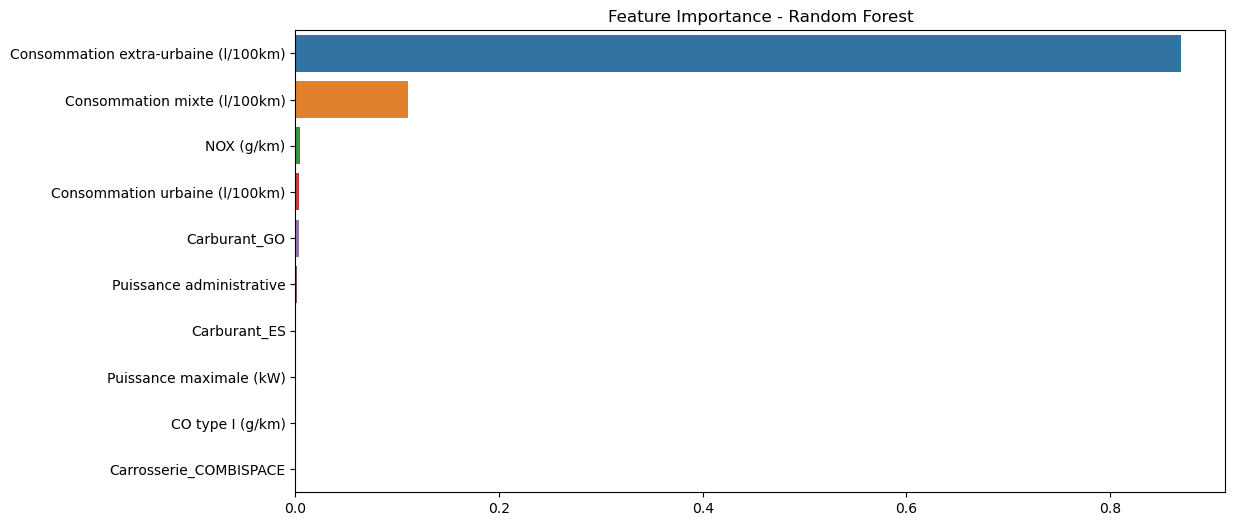

C:\Users\abida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


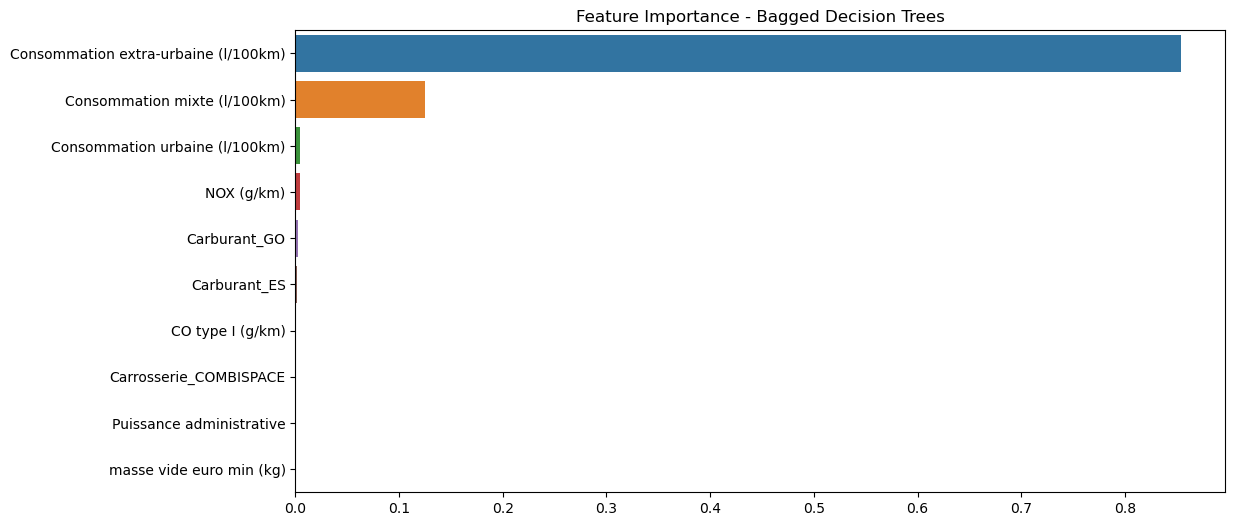

C:\Users\abida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


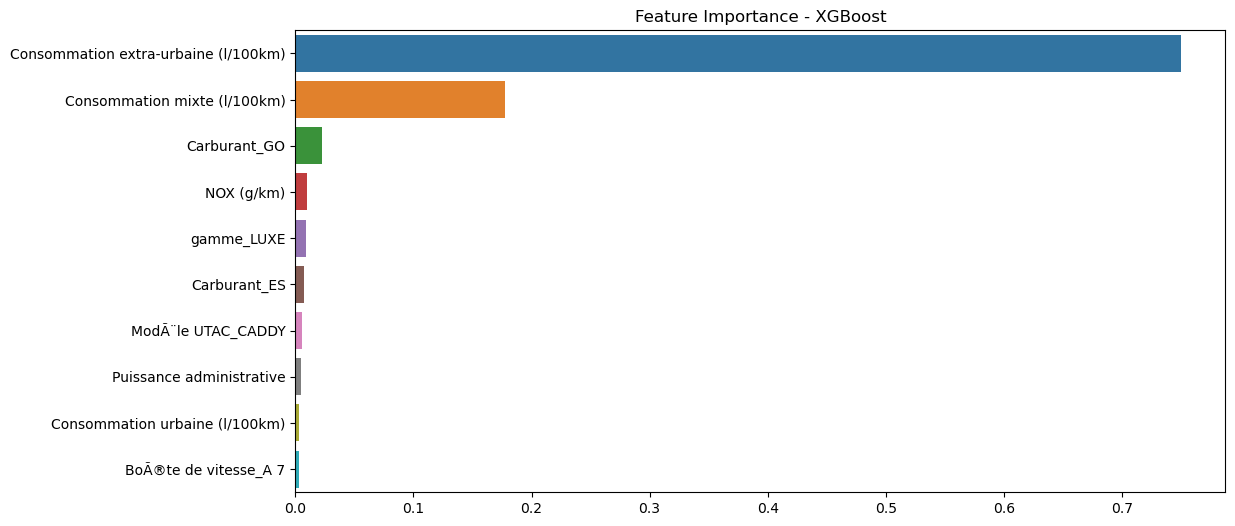

C:\Users\abida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


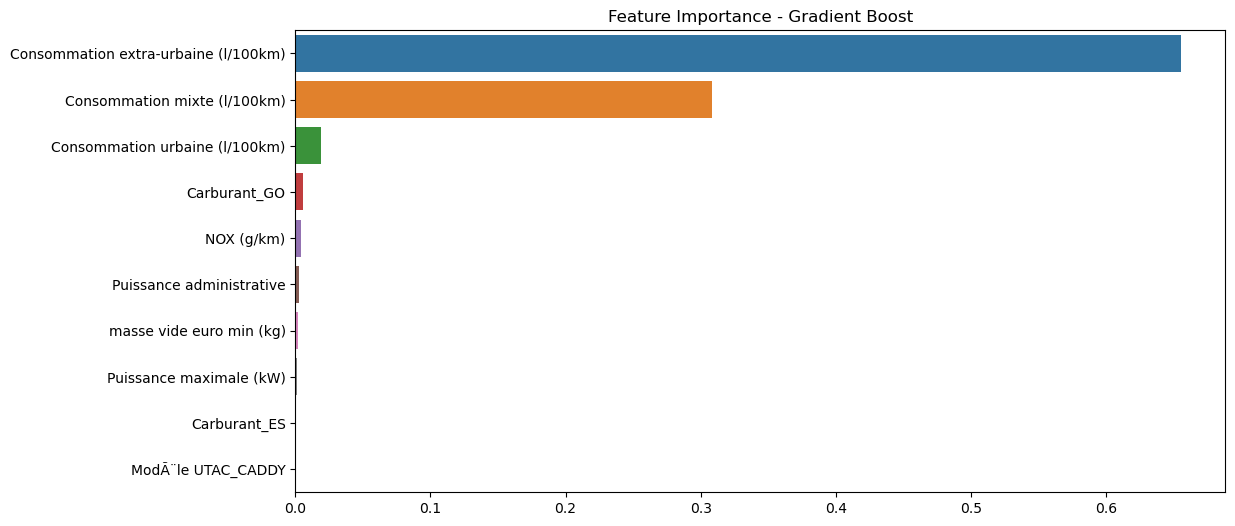

C:\Users\abida\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


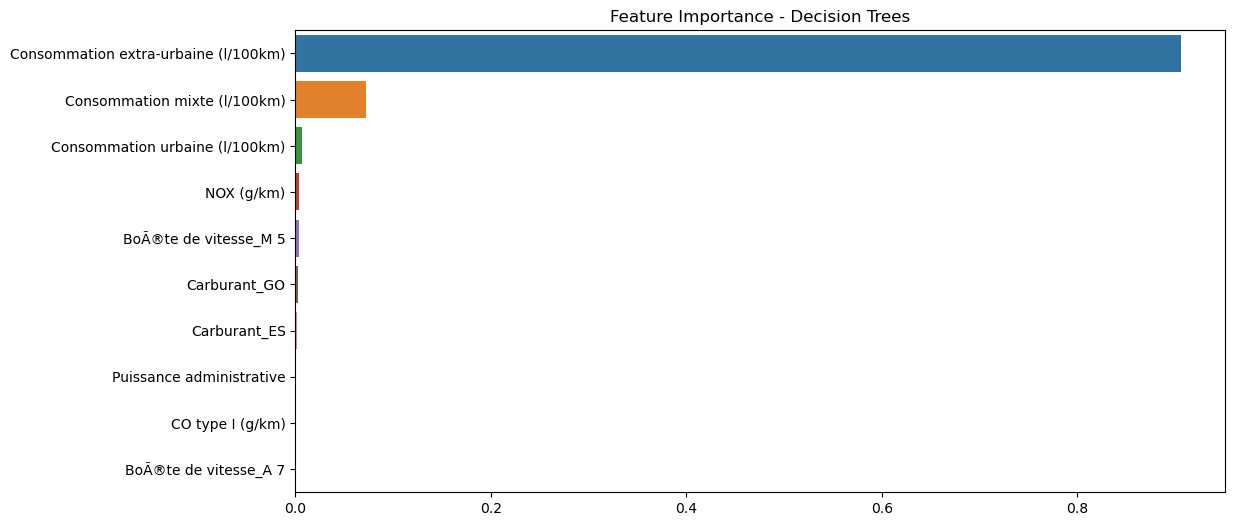

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot Feature Importance for each model
models = [rf_model, bagged_dt, xgboost, gradient_boosting, dt_regressor]
model_names = ['Random Forest', 'Bagged Decision Trees', 'XGBoost', 'Gradient Boost', 'Decision Trees']

for model, name in zip(models, model_names):
    if name == 'Bagged Decision Trees':
        importances = np.mean([estimator.feature_importances_ for estimator in model.estimators_], axis=0)
    else:
        importances = model.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importance - {name}")
    sns.barplot(x=importances[indices][:10], y=[X.columns[i] for i in indices][:10])
    plt.show()

In [53]:
pip install --user shap

   ---------------------------------------- 0.0/455.5 kB ? eta -:--:--
    --------------------------------------- 10.2/455.5 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/455.5 kB 1.8 MB/s eta 0:00:01
   ---------------------- ----------------- 256.0/455.5 kB 2.3 MB/s eta 0:00:01
   ----------------------------------- ---- 399.4/455.5 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 455.5/455.5 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/1000 [00:00<?, ?it/s]

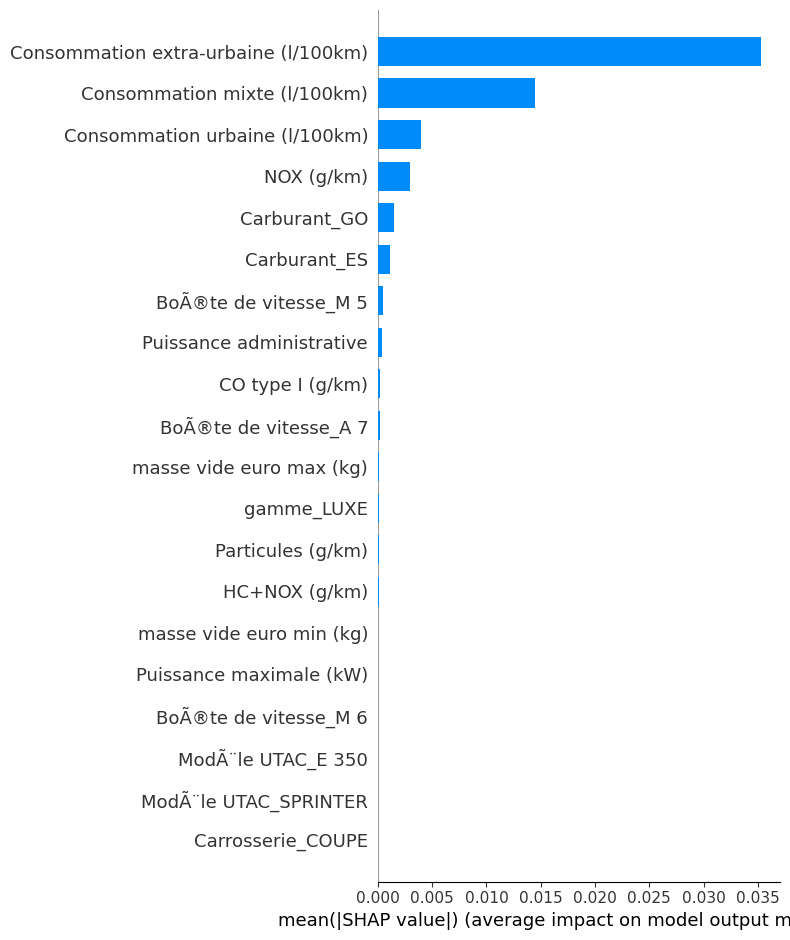

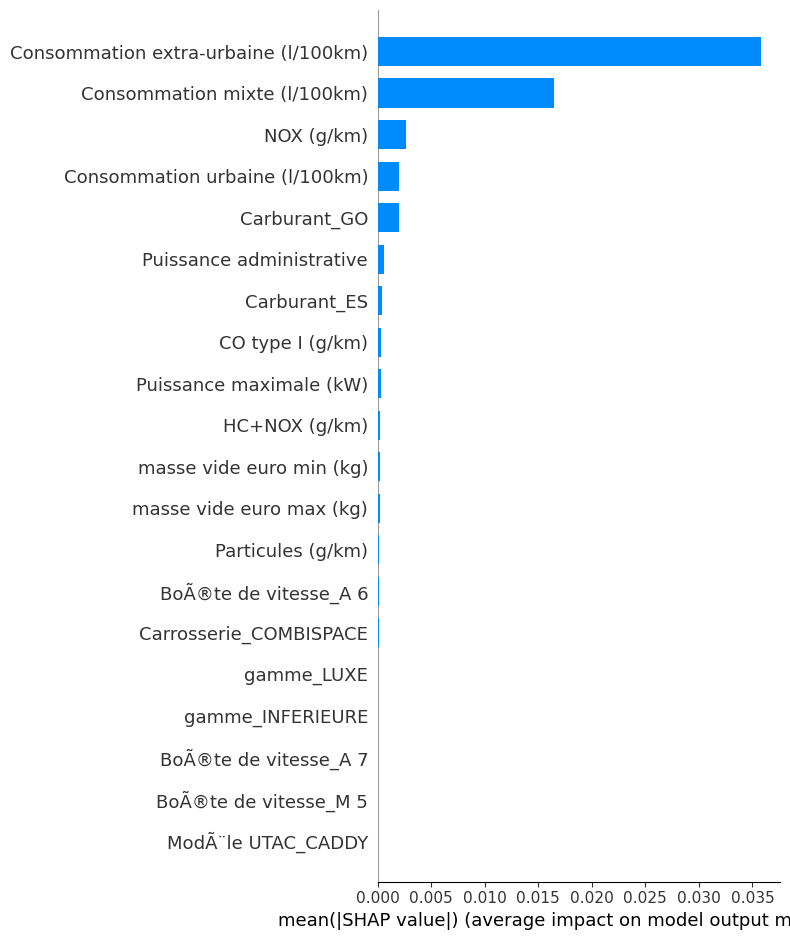

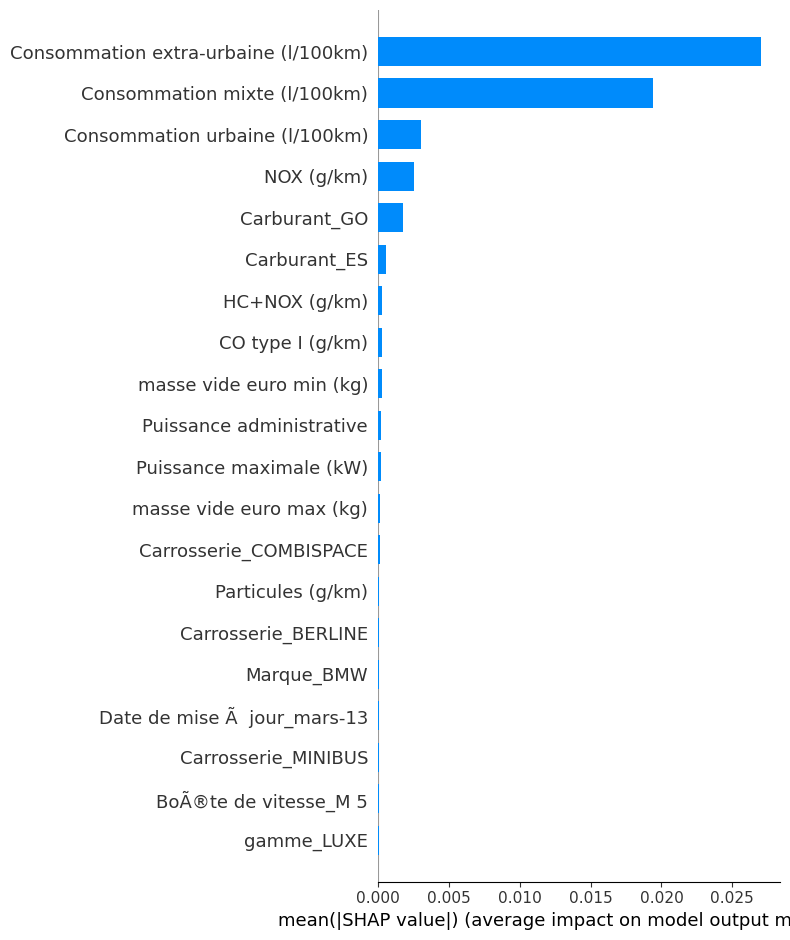

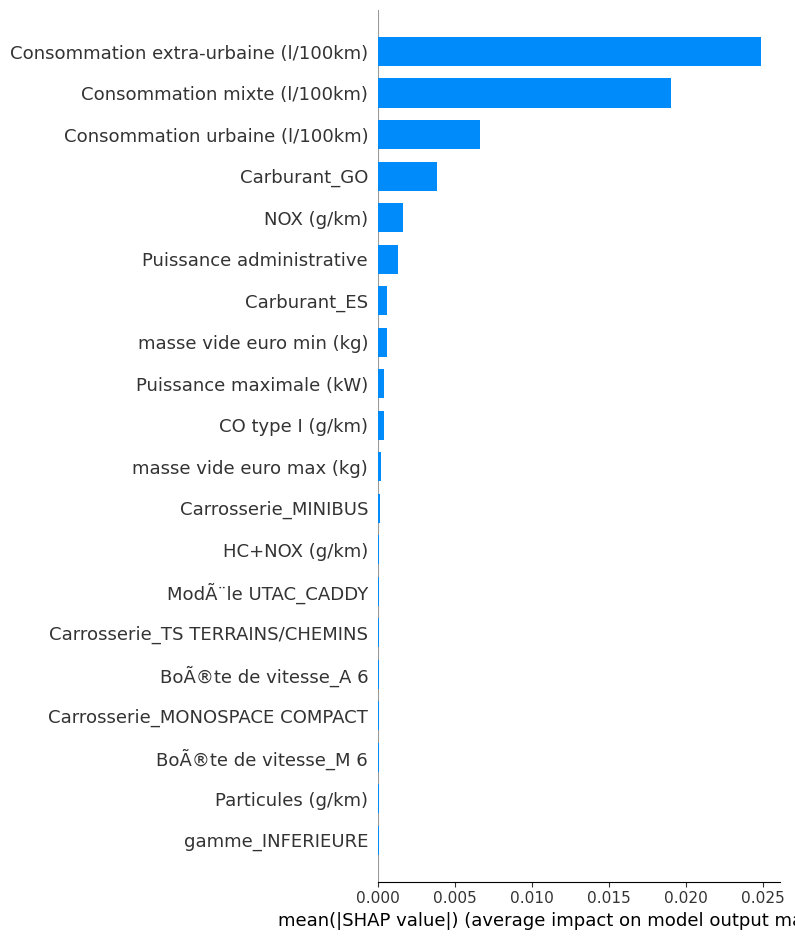

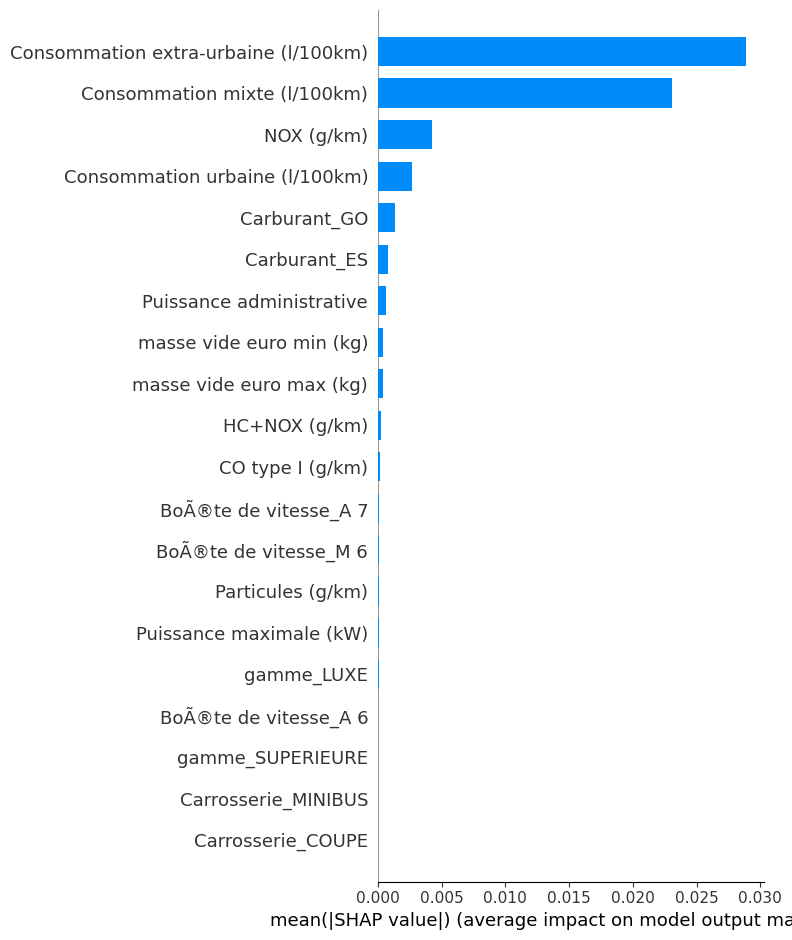

In [55]:
import shap
import numpy as np

# Sample a subset of your data (e.g., 1000 rows)
sampled_data = X.sample(1000, random_state=1)
background_data = sampled_data.sample(100, random_state=1)

# Initialize SHAP explainers for each model
dt_explainer = shap.TreeExplainer(dt_regressor)
rf_explainer = shap.TreeExplainer(rf_model)
bagged_dt_explainer = shap.KernelExplainer(bagged_dt.predict, background_data)
gradient_boosting_explainer = shap.TreeExplainer(gradient_boosting)
xgboost_explainer = shap.TreeExplainer(xgboost)

# Compute SHAP values
dt_shap_values = dt_explainer.shap_values(sampled_data)
rf_shap_values = rf_explainer.shap_values(sampled_data)
bagged_dt_shap_values = bagged_dt_explainer.shap_values(sampled_data, nsamples=100)  # Reduce nsamples if computation is too slow
gradient_boosting_shap_values = gradient_boosting_explainer.shap_values(sampled_data)
xgboost_shap_values = xgboost_explainer.shap_values(sampled_data)

# Visualize SHAP values
shap.summary_plot(dt_shap_values, sampled_data, plot_type="bar", title="Decision Trees")
shap.summary_plot(rf_shap_values, sampled_data, plot_type="bar", title="Random Forest")
shap.summary_plot(bagged_dt_shap_values, sampled_data, plot_type="bar", title="Bagged Decision Trees")
shap.summary_plot(gradient_boosting_shap_values, sampled_data, plot_type="bar", title="Gradient Boosting")
shap.summary_plot(xgboost_shap_values, sampled_data, plot_type="bar", title="XGBoost")


In [56]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 262.6 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/275.7 kB 245.8 kB/s eta 0:00:01
     ---------------- ------------------- 122.9/275.7 kB 602.4 kB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Intercept 0.26743673251285227
Prediction_local [0.39105673]
Right: 0.47155963302752424


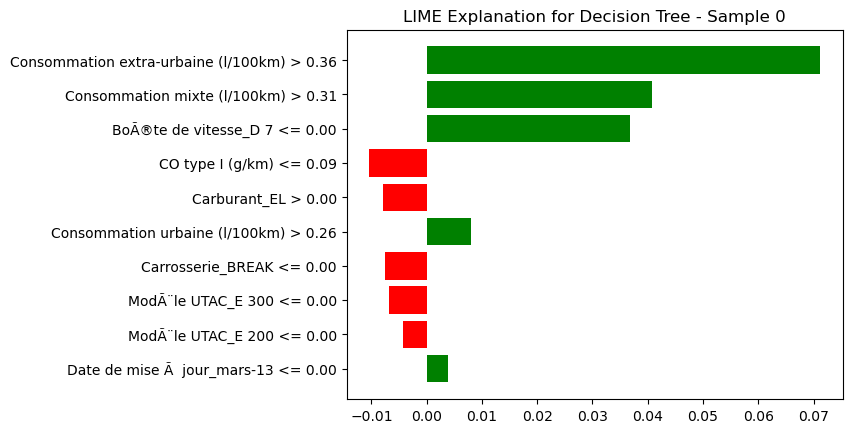

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 0.2699773211752401
Prediction_local [0.37752196]
Right: 0.471559633027524


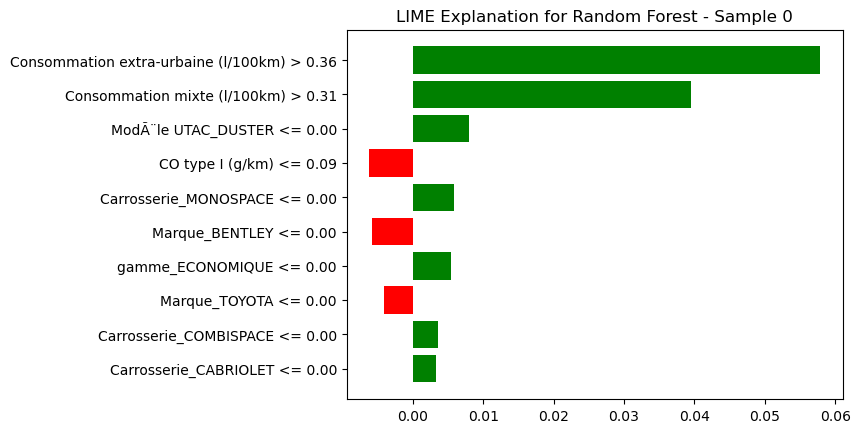

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


Intercept 0.29842968438824746
Prediction_local [0.37619559]
Right: 0.47155963302752335


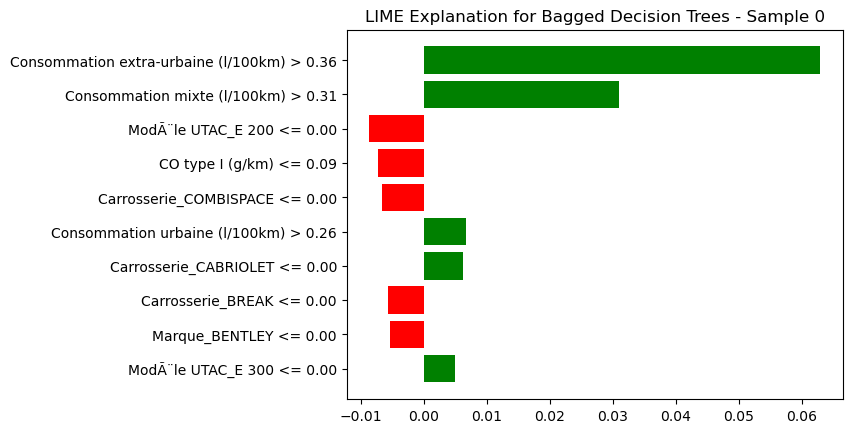

C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Intercept 0.28068377109099596
Prediction_local [0.38300795]
Right: 0.4714940388184291


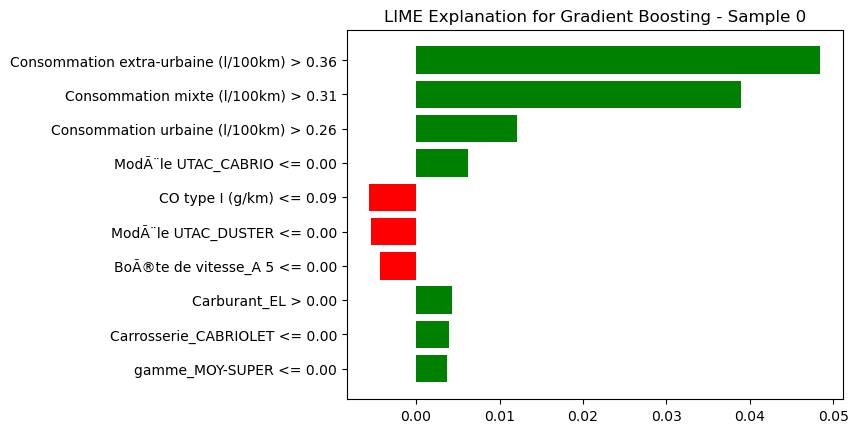

Intercept 0.2629089489847901
Prediction_local [0.37607892]
Right: 0.47150582


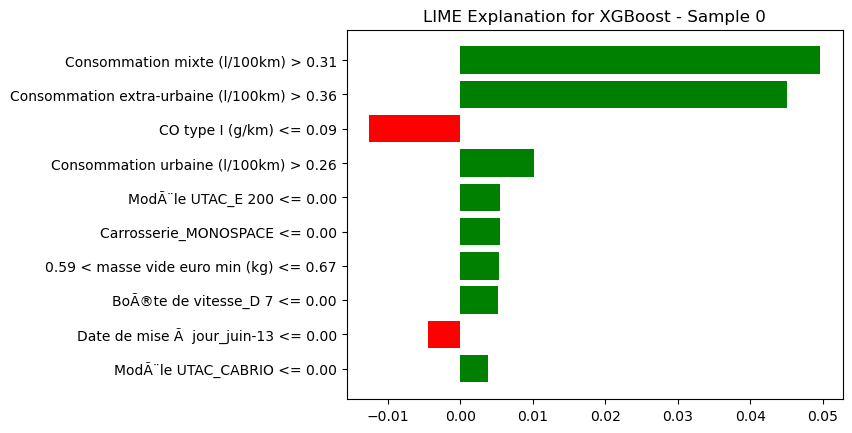

In [57]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Ensure X_train is a NumPy array
X_train = X_train.values if hasattr(X_train, 'values') else X_train
X_test = X_test.values if hasattr(X_test, 'values') else X_test

feature_names = df.columns.tolist()

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=['Target'],
    verbose=True,
    mode='regression'
)

# Function to generate LIME explanations and visualize them
def plot_lime_explanation(model, model_name, sample_index):
    # Get a sample from the test set
    sample = X_test[sample_index].reshape(1, -1)
    
    # Explain the prediction for the sample
    exp = explainer.explain_instance(
        sample.flatten(),
        model.predict,
        num_features=10
    )
    
    # Plot the explanation
    fig = exp.as_pyplot_figure()
    plt.title(f'LIME Explanation for {model_name} - Sample {sample_index}')
    plt.show()

# List of models and their names
models = [
    (dt_regressor, 'Decision Tree'),
    (rf_model, 'Random Forest'),
    (bagged_dt, 'Bagged Decision Trees'),
    (gradient_boosting, 'Gradient Boosting'),
    (xgboost, 'XGBoost')
]

# Generate and plot LIME explanations for a sample index
sample_index = 0  # You can change this to any index of your choice

for model, model_name in models:
    plot_lime_explanation(model, model_name, sample_index)


Plotting PDP for Decision Tree


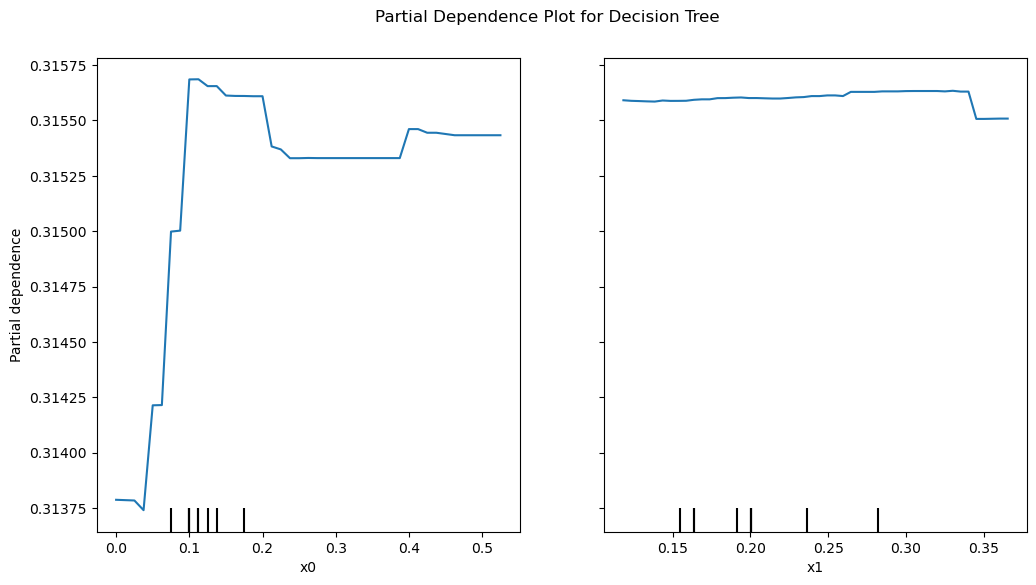

Plotting PDP for Random Forest


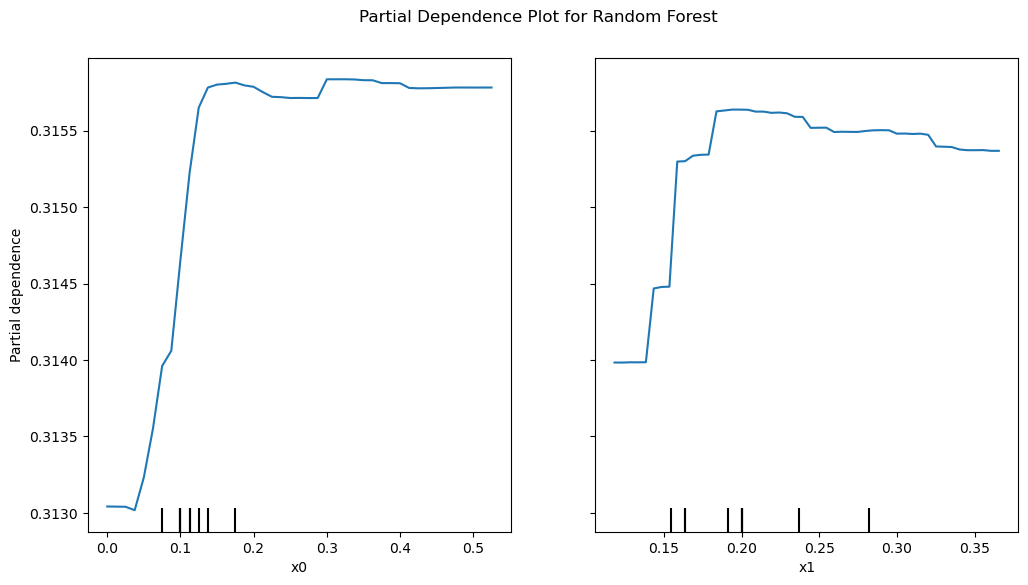

Plotting PDP for Bagged Decision Trees


C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
C:\Users\abida\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not ha

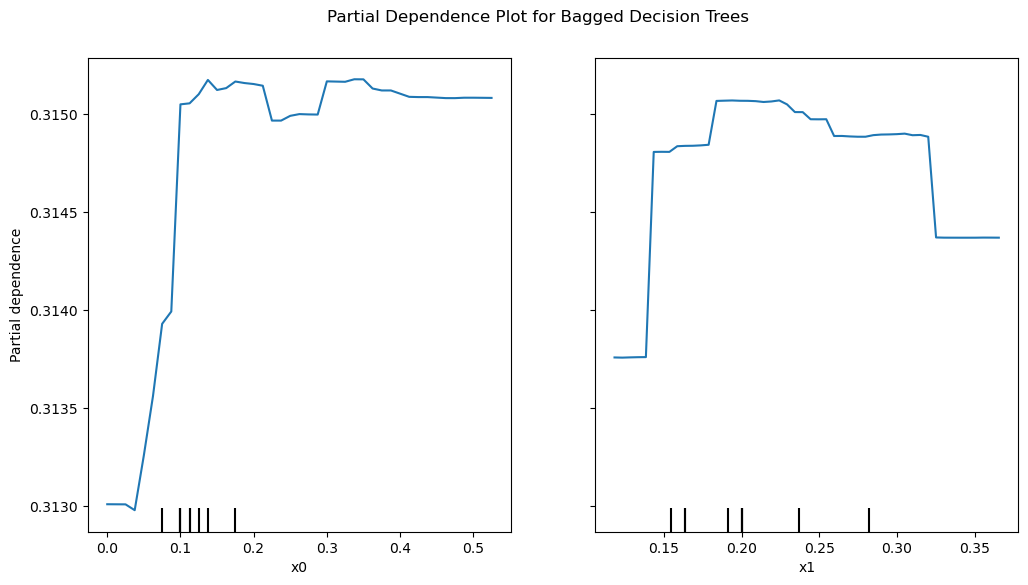

Plotting PDP for Gradient Boost


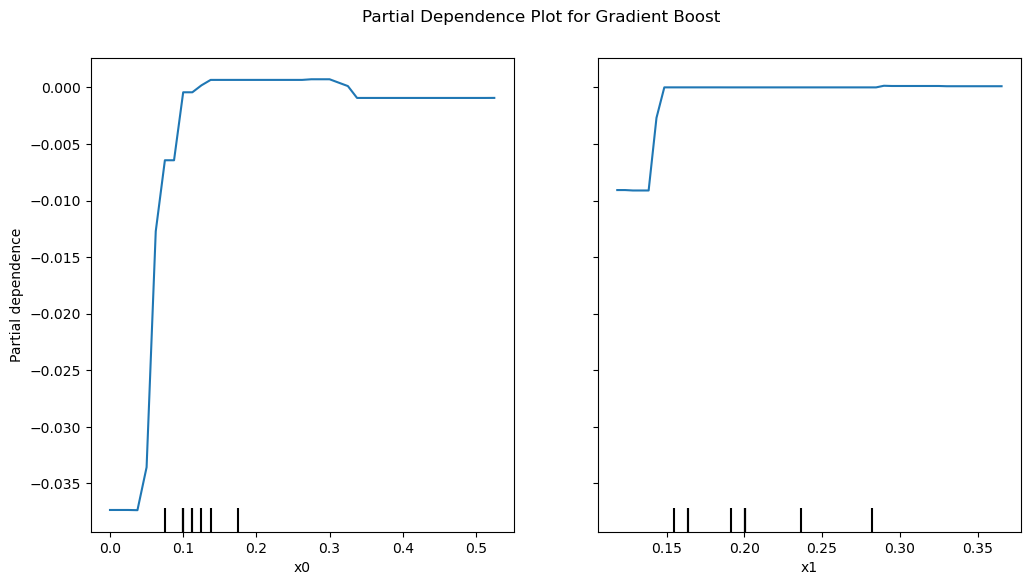

Plotting PDP for XGBoost


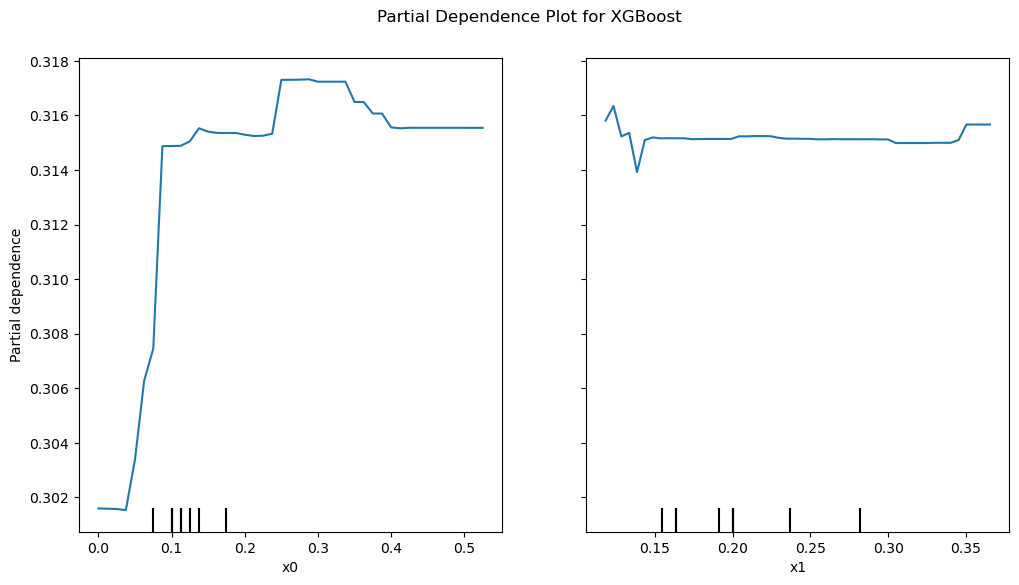

In [58]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay


models = [
    ('Decision Tree', dt_regressor),
    ('Random Forest', rf_model),
    ('Bagged Decision Trees', bagged_dt),
    ('Gradient Boost', gradient_boosting),
    ('XGBoost', xgboost)
]

# Features for which to plot PDPs 
features = [0, 1]  # We can change these to the indices or names of the features we want to plot

for name, model in models:
    print(f"Plotting PDP for {name}")
    fig, ax = plt.subplots(figsize=(12, 6))
    pdp_display = PartialDependenceDisplay.from_estimator(model, X_test, features, ax=ax, grid_resolution=50)
    plt.suptitle(f'Partial Dependence Plot for {name}')
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()


C:\Users\abida\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


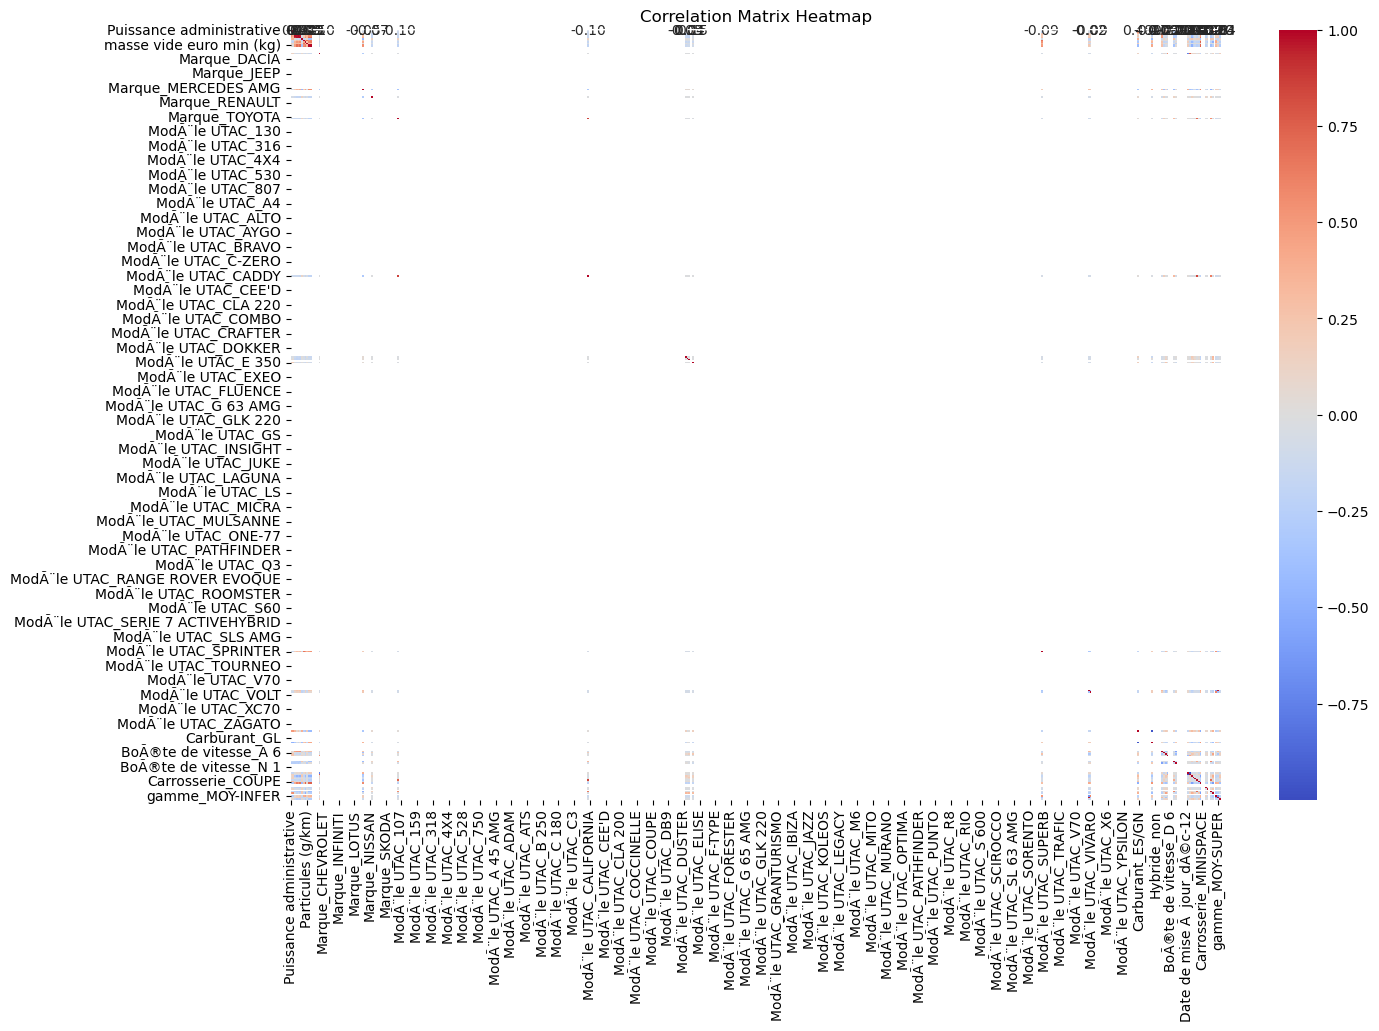

Correlations with the target variable (CO2 (g/km)):
CO2 (g/km)                              1.000000
Consommation extra-urbaine (l/100km)    0.980654
Consommation mixte (l/100km)            0.969864
Consommation urbaine (l/100km)          0.917270
masse vide euro min (kg)                0.706037
                                          ...   
Date de mise Ã  jour_dÃ©c-12                 NaN
Carrosserie_MINISPACE                        NaN
Carrosserie_MONOSPACE                        NaN
gamme_ECONOMIQUE                             NaN
gamme_MOY-INF                                NaN
Name: CO2 (g/km), Length: 533, dtype: float64


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Extract the correlations with the target variable
target_correlations = corr_matrix['CO2 (g/km)'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlations with the target variable (CO2 (g/km)):")
print(target_correlations)


<Figure size 1500x1000 with 0 Axes>

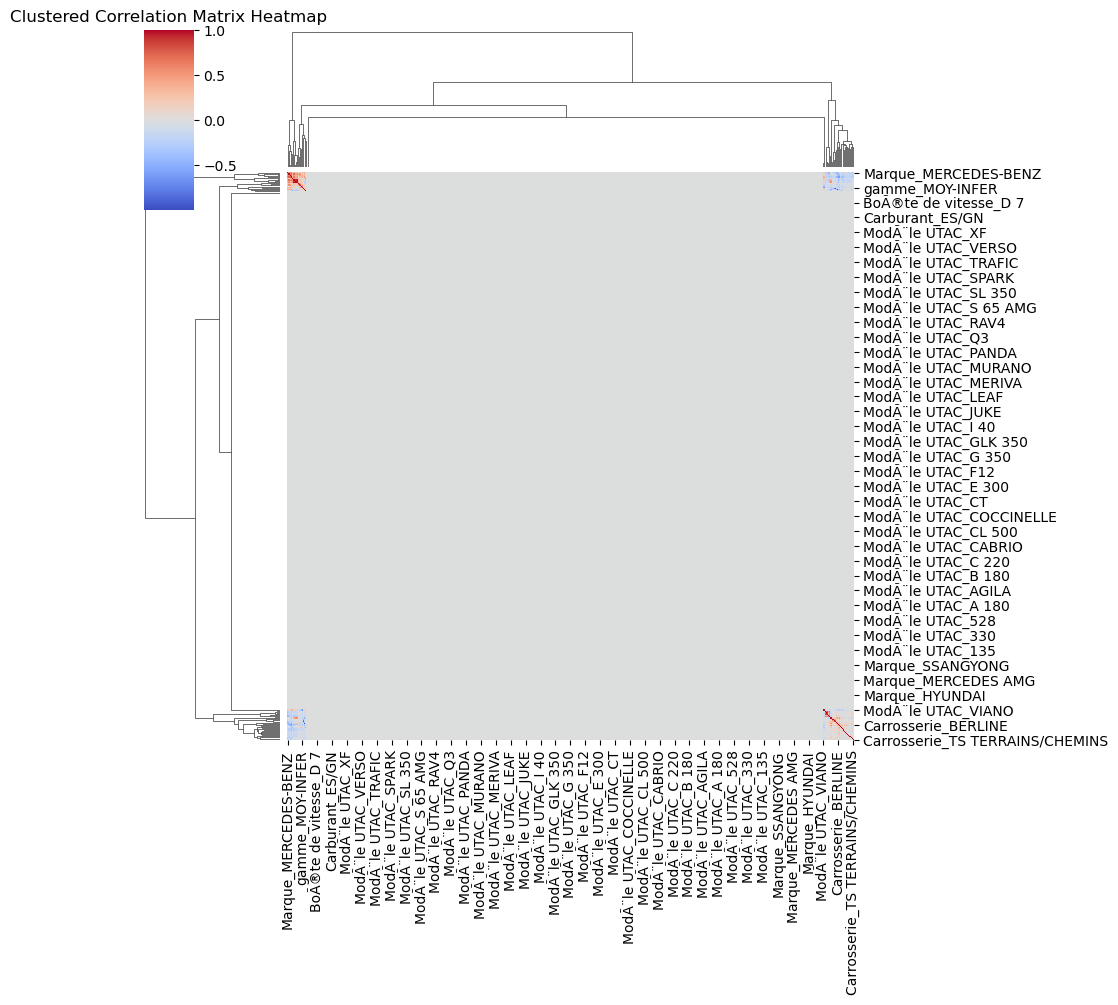

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the correlation matrix
corr_matrix = df.corr()

# Replace NaN values with 0
corr_matrix = corr_matrix.fillna(0)

# Generate a linkage matrix for hierarchical clustering
linkage_matrix = linkage(corr_matrix, method='ward')

# Plot the clustered heatmap
plt.figure(figsize=(15, 10))
sns.clustermap(corr_matrix, annot=False, cmap='coolwarm', cbar=True, row_linkage=linkage_matrix, col_linkage=linkage_matrix)
plt.title('Clustered Correlation Matrix Heatmap')
plt.show()


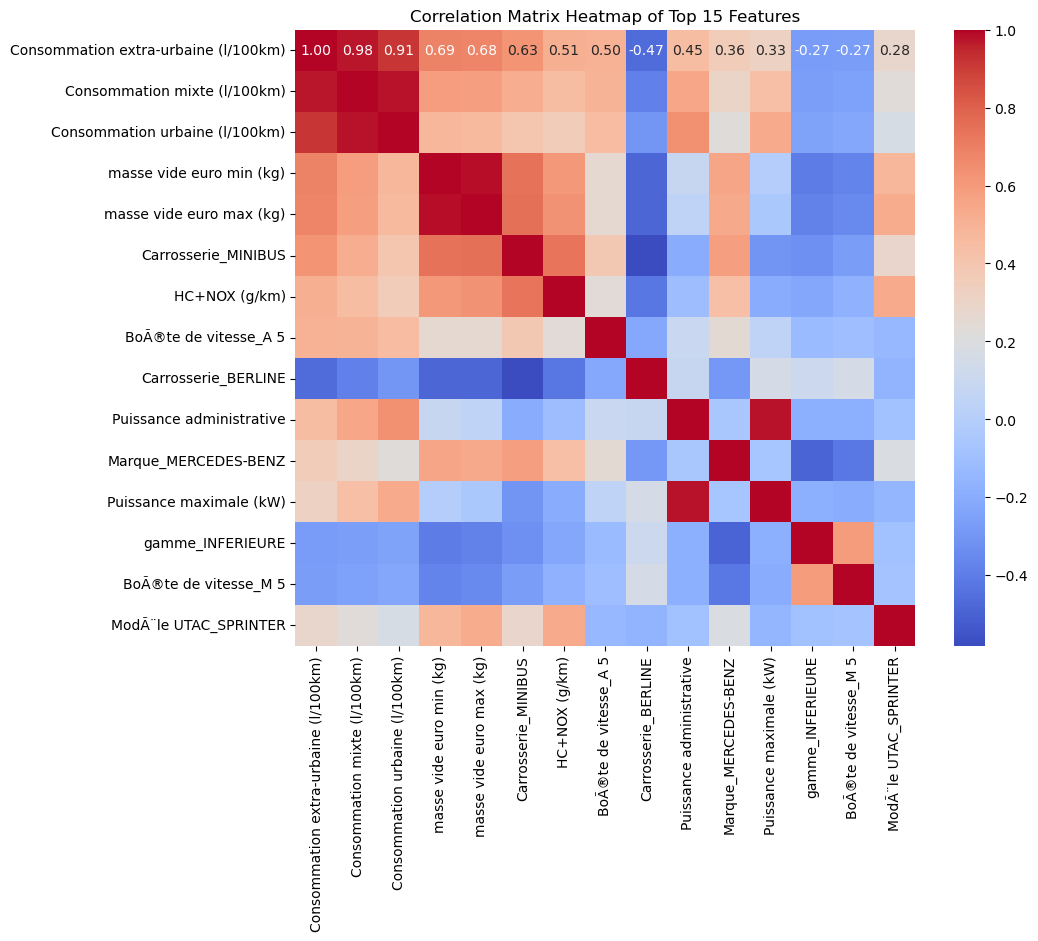

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract the correlations with the target variable
target_correlations = corr_matrix['CO2 (g/km)'].abs().sort_values(ascending=False)

# Select top 10 features most correlated with the target variable
top_features = target_correlations.index[1:16]  # Exclude the target itself
selected_corr_matrix = df[top_features].corr()

# Plot the heatmap for the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap of Top 15 Features')
plt.show()


C:\Users\abida\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


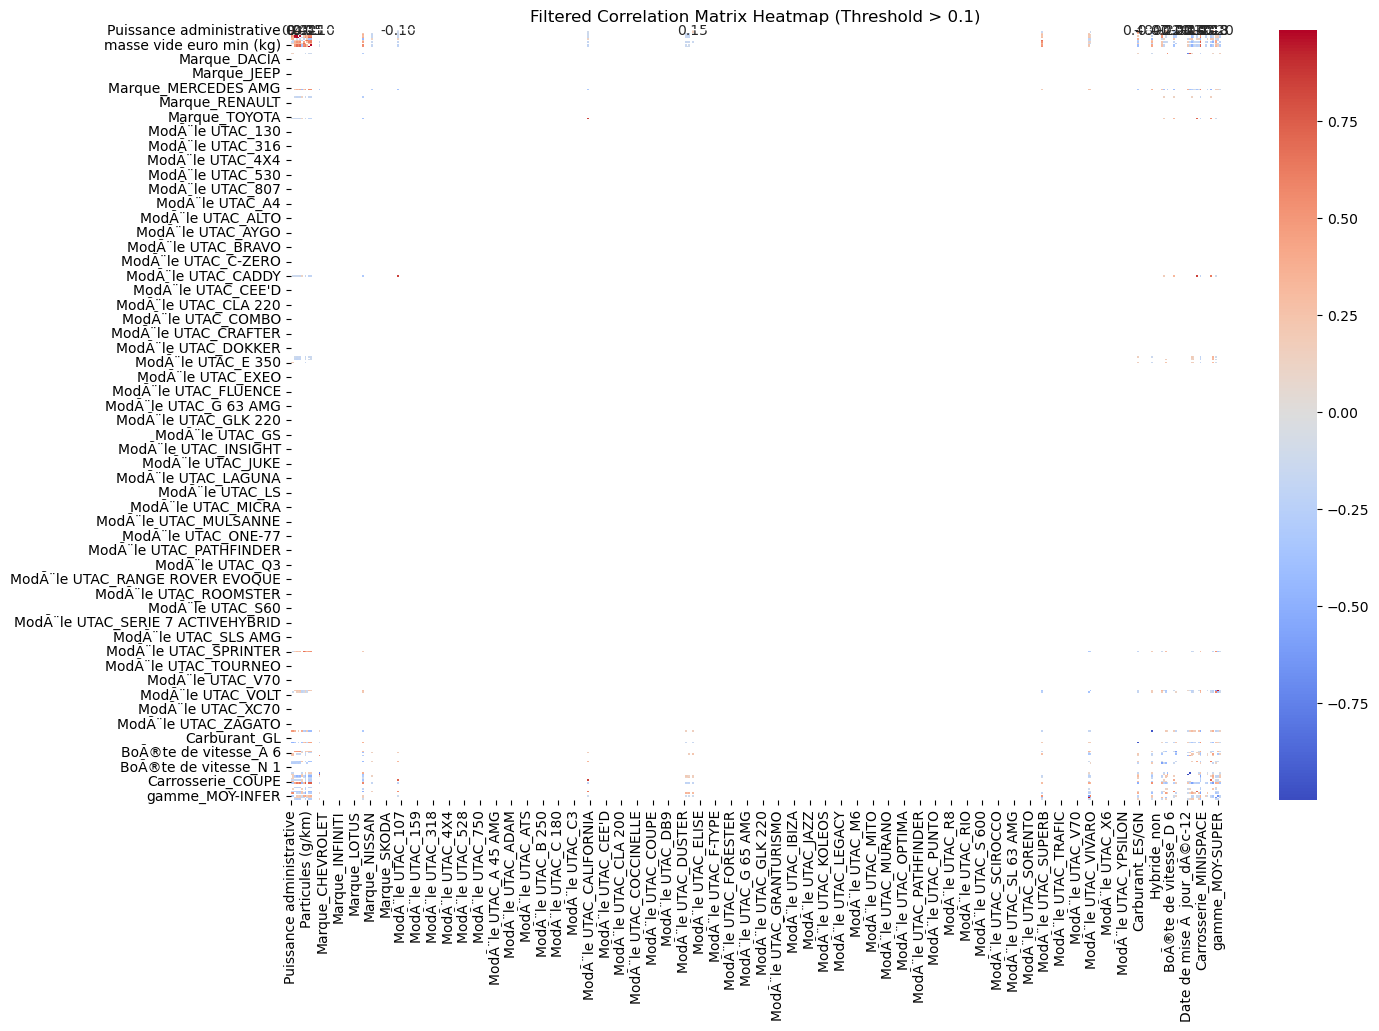

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set a threshold for filtering correlations
threshold = 0.1

# Filter the correlation matrix
filtered_corr_matrix = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix != 1.0)]

# Plot the heatmap for the filtered correlations
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Filtered Correlation Matrix Heatmap (Threshold > 0.1)')
plt.show()


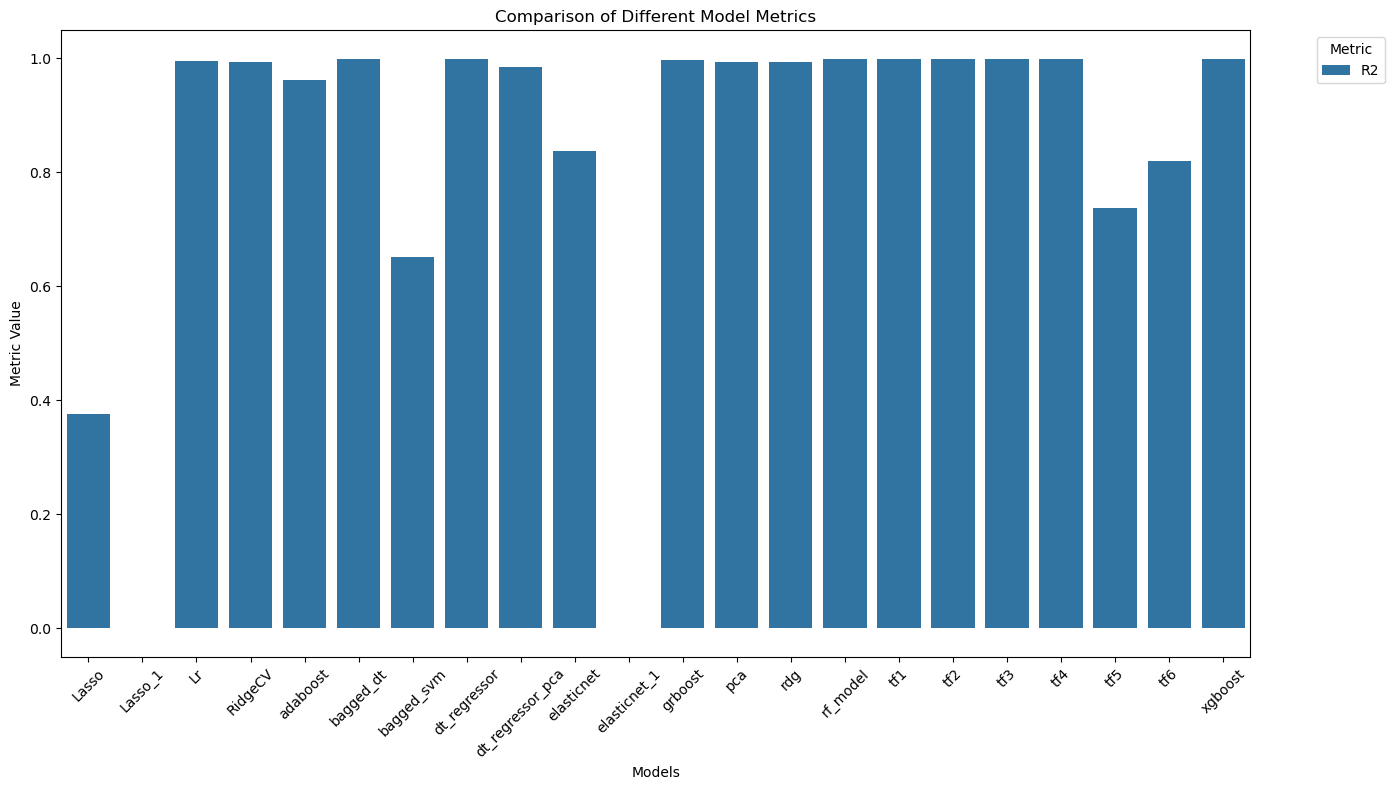

In [88]:

import matplotlib.pyplot as plt
import seaborn as sns

df_metrics = {
    'Lr': metrics_Lr,
    'pca': metrics_pca,
    'rdg': metrics_rdg,
    'RidgeCV': metrics_RidgeCV,
    'Lasso_1': metrics_Lasso_1,
    'Lasso': metrics_Lasso,
    'elasticnet_1': metrics_elasticnet_1,
    'elasticnet': metrics_elasticnet,
    'dt_regressor': metrics_dt_regressor,
    'dt_regressor_pca': metrics_dt_regressor_pca,
    'rf_model': metrics_rf_model,
    'bagged_dt': metrics_bagged_dt,
    'bagged_svm': metrics_bagged_svm,
    'adaboost': metrics_adaboost,
    'grboost': metrics_grboost,
    'xgboost': metrics_xgboost,
    'tf1': metrics_tf1,
    'tf2': metrics_tf2,
    'tf3': metrics_tf3,
    'tf4': metrics_tf4,
    'tf5': metrics_tf5,
    'tf6': metrics_tf6
}

combined_metrics = []

for model_name, df in df_metrics.items():

    if 'Model' not in df.columns:
        df.insert(0, 'Model', model_name)

    combined_metrics.append(df)

combined_df = pd.concat(combined_metrics, ignore_index=True)

df_metrics= combined_df.pivot(index='Model', columns='Metric', values='Value').reset_index()

df_metrics.to_csv('../notebooks/df_metrics.csv', index=False)

metrics_to_plot = ['R2']# you can change this metric or add an other one!

melted_df = metrics_pivot_df.melt(id_vars='Model', value_vars=metrics_to_plot, var_name='Metric', value_name='Value')

# Visualisierung
plt.figure(figsize=(14, 8))

# Creating the bar plot using seaborn
sns.barplot(x='Model', y='Value', hue='Metric', data=melted_df)

# Adjusting the x-axis labels rotation
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Comparison of Different Model Metrics')

# Adding the legend outside the plot
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optimizing the layout and displaying the plot
plt.tight_layout()
plt.show()


